In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
def plot_stdv(stdv, title, image_name, zoomin_range=None):
    if(zoomin_range is not None):
        stdvx = stdv[zoomin_range[0]: zoomin_range[1]]
    else:
        stdvx = stdv
    fig=plt.figure(figsize=(12,12))
    plt.plot(stdvx)
    plt.title(title, fontsize=24)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.savefig(image_name)
    
def plot_corr_box(cor, title, image_name, zoomin_range=None):
    if(zoomin_range is not None):
        corx = cor[zoomin_range[0]:zoomin_range[1], zoomin_range[0]:zoomin_range[1]]
    else:
        corx = cor
    fig=plt.figure(figsize=(12,12))
    plt.imshow(corx)
    cbar=plt.colorbar(shrink=0.8, orientation='horizontal', pad=0.05)
    cbar.ax.tick_params(labelsize=14)
    plt.title(title, fontsize=24)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.savefig(image_name)

def plot_corr_point(cor_row, title, image_name, zoomin_range=None):
    if(zoomin_range is not None):
        cor_row_x = cor_row[zoomin_range[0]:zoomin_range[1]]
        xcoord = np.arange(zoomin_range[0],zoomin_range[1])
    else:
        cor_row_x = cor_row
        xcoord = np.arange(0, len(cor_row))
    fig=plt.figure(figsize=(12,12))
    plt.plot(xcoord, cor_row_x)
    plt.title(title, fontsize=24)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.savefig(image_name)


/home/si/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


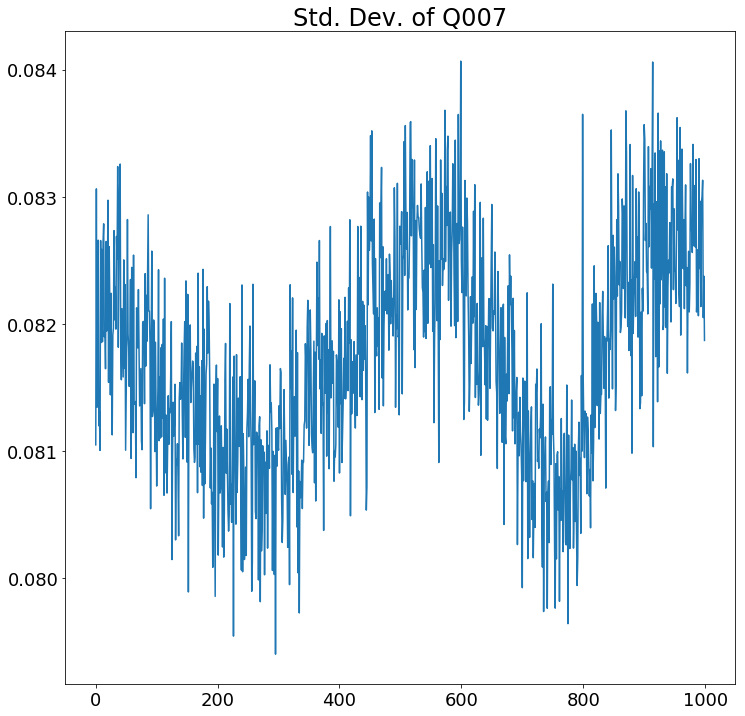

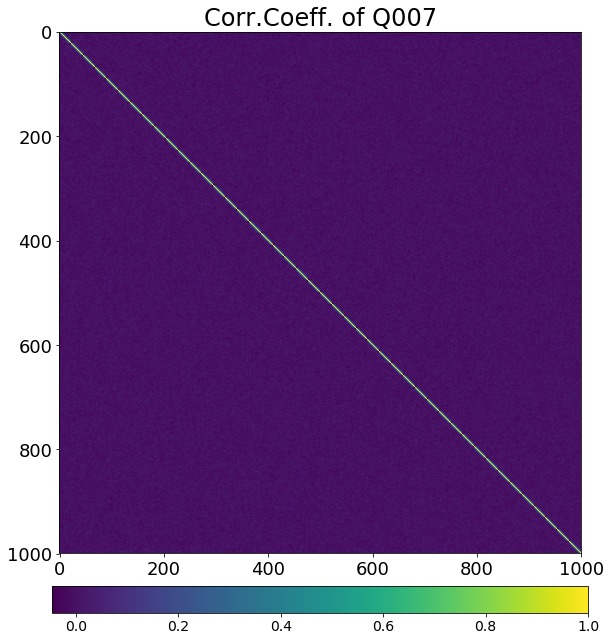

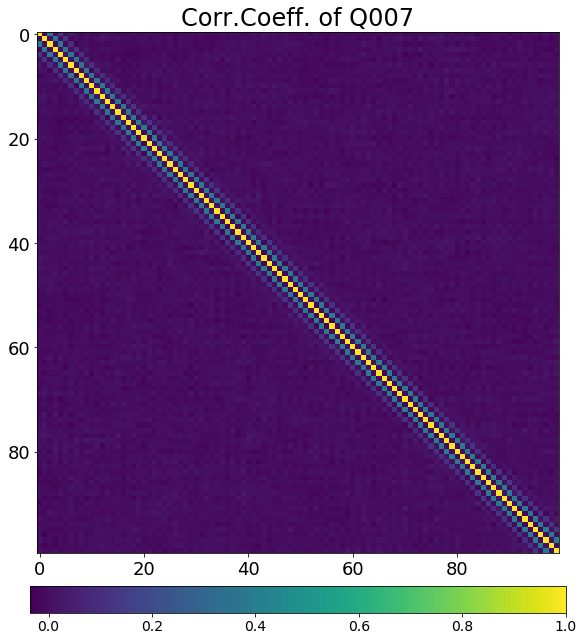

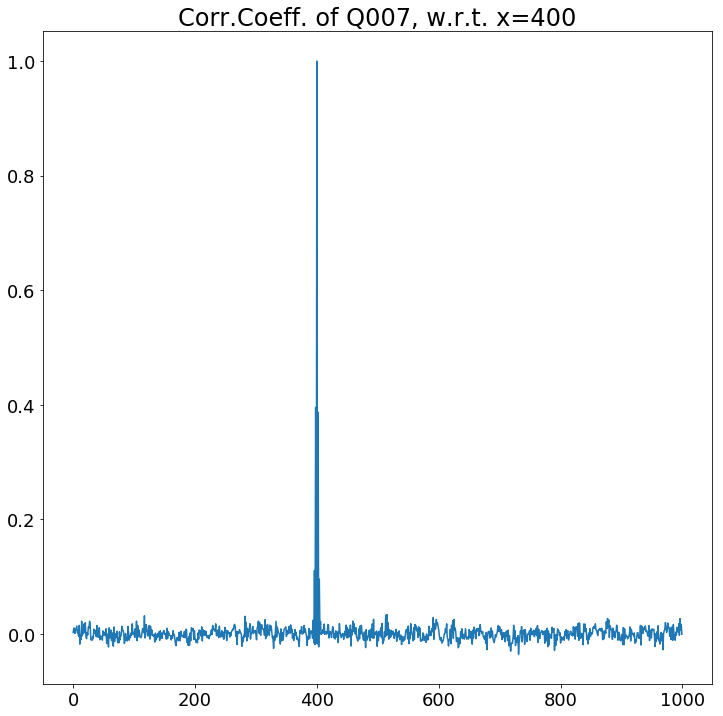

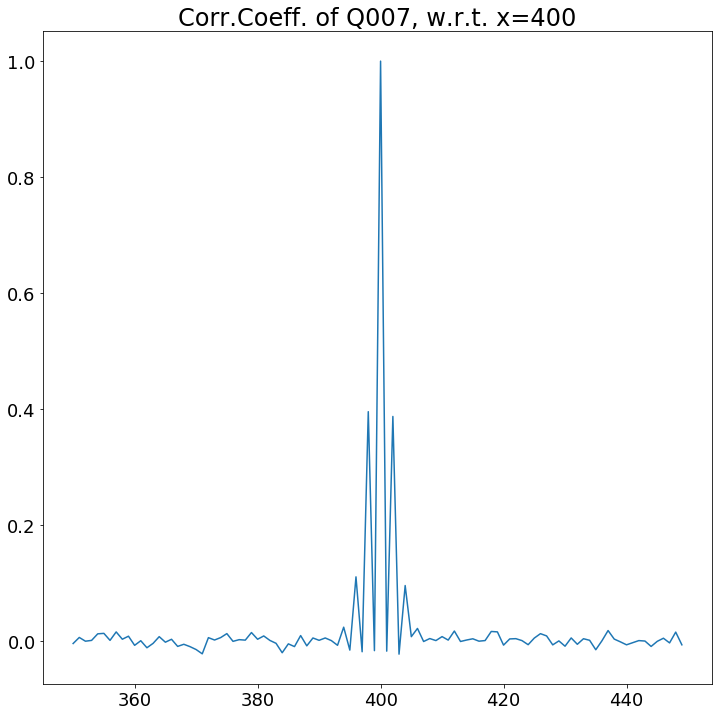

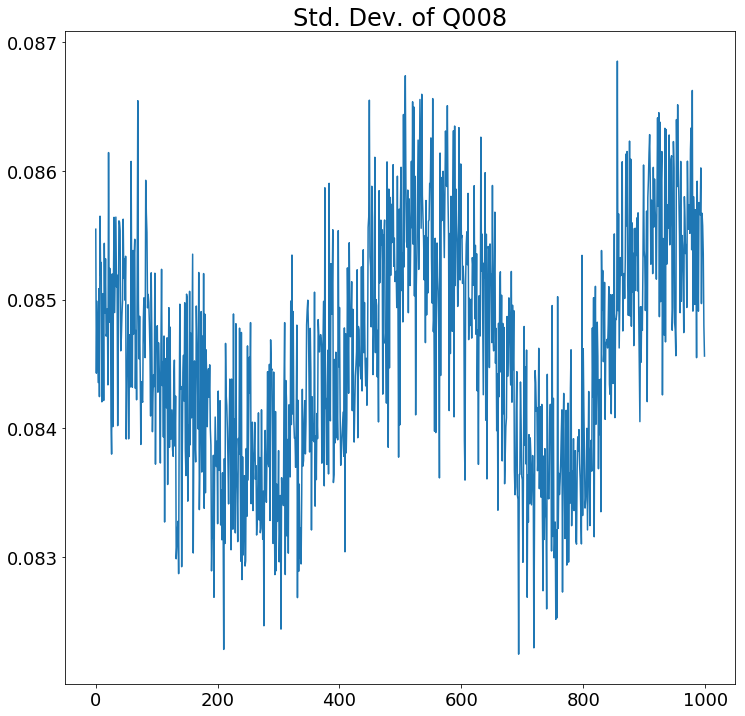

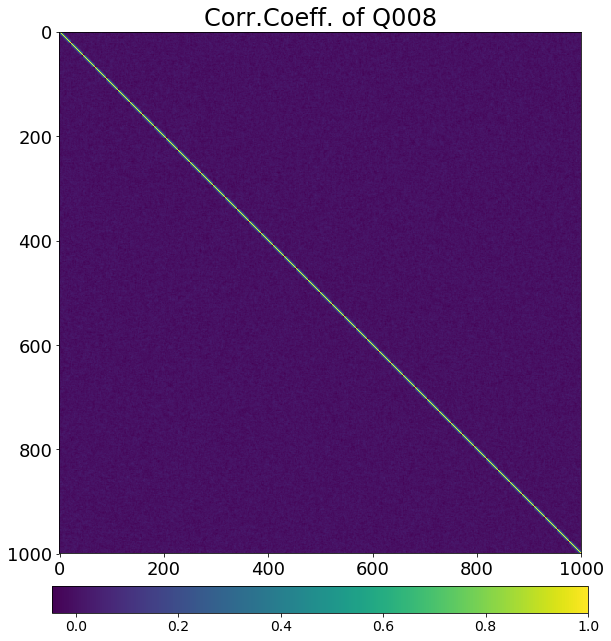

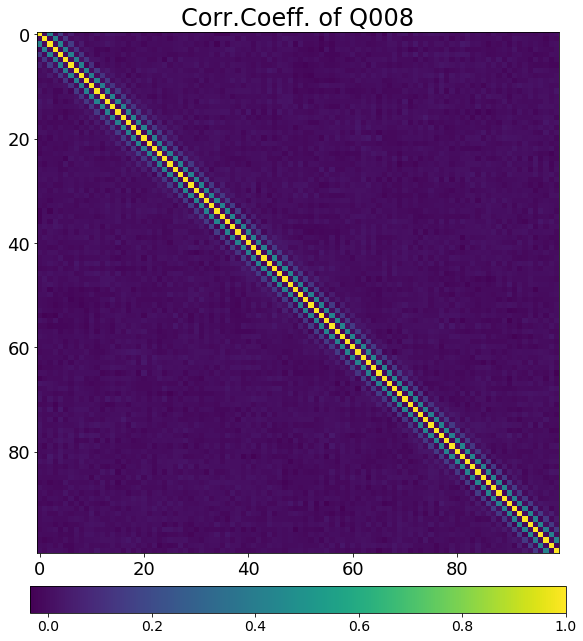

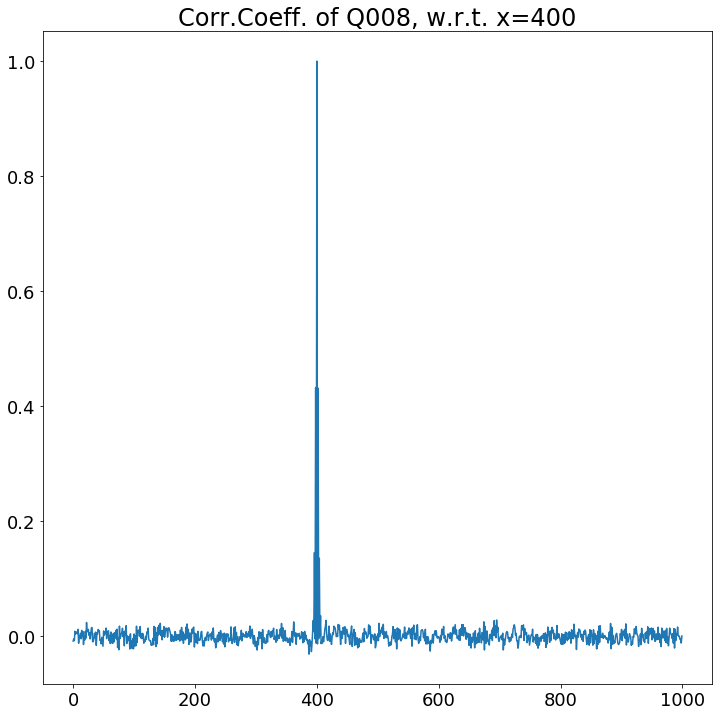

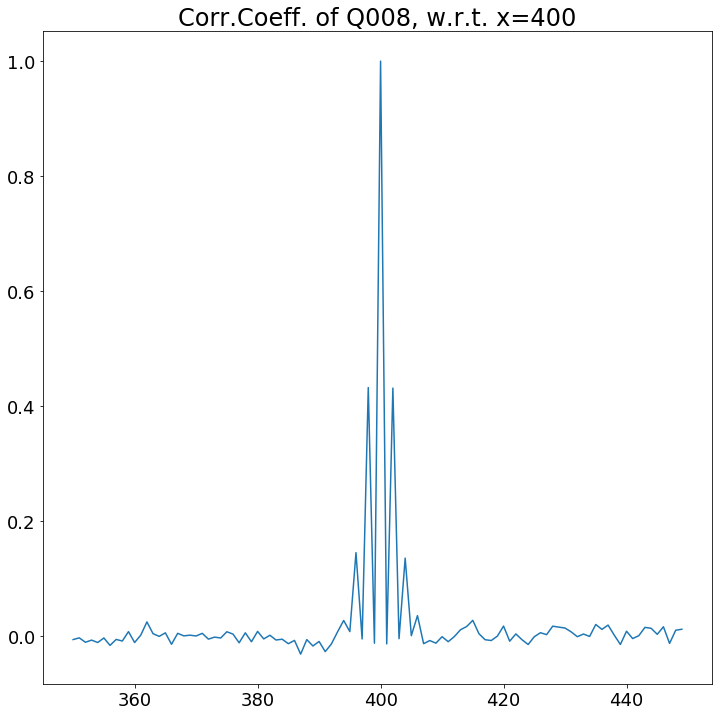

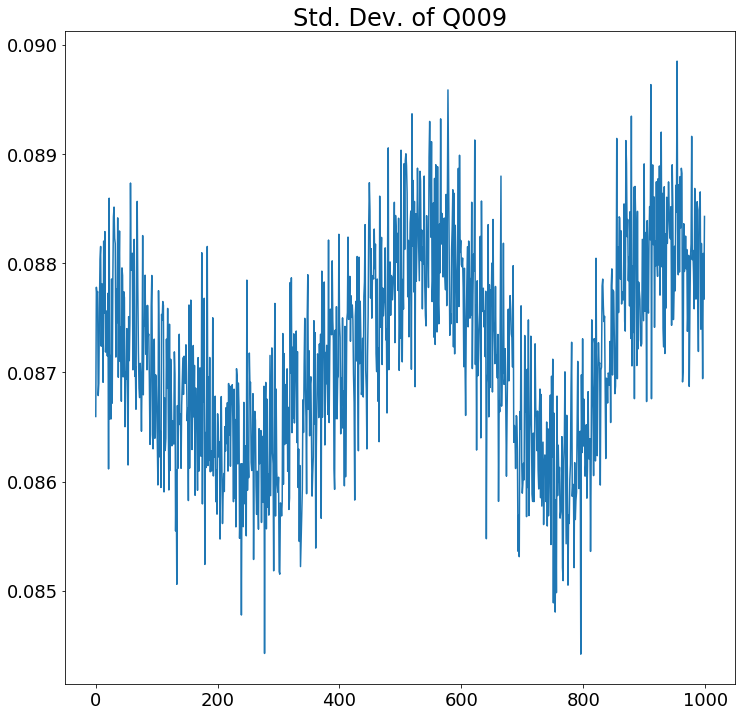

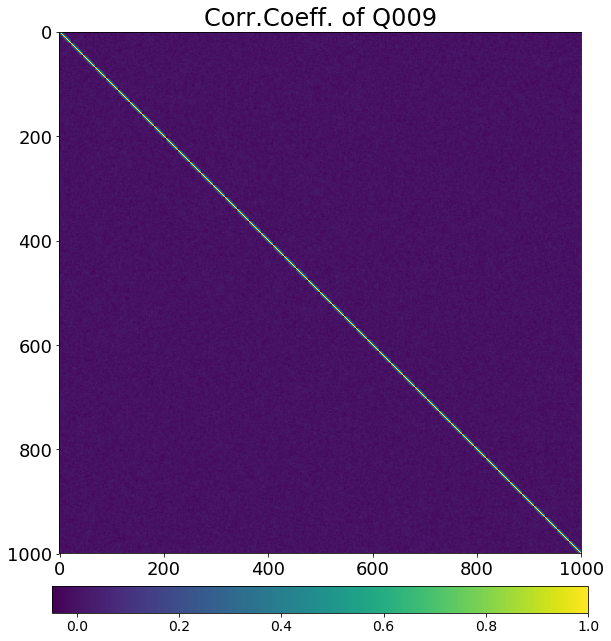

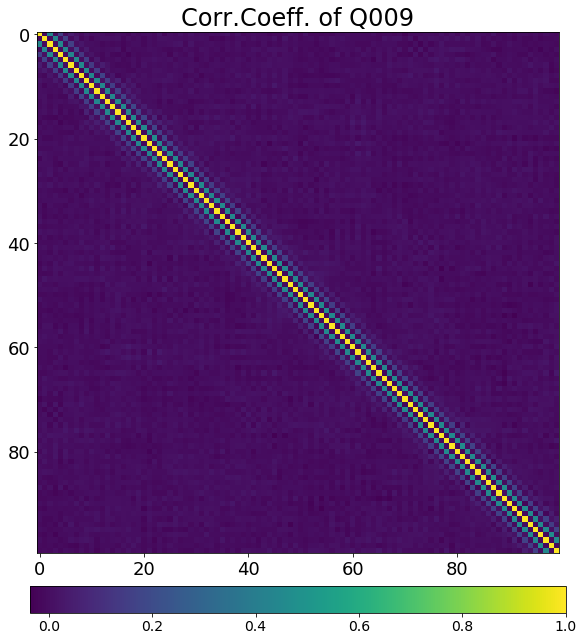

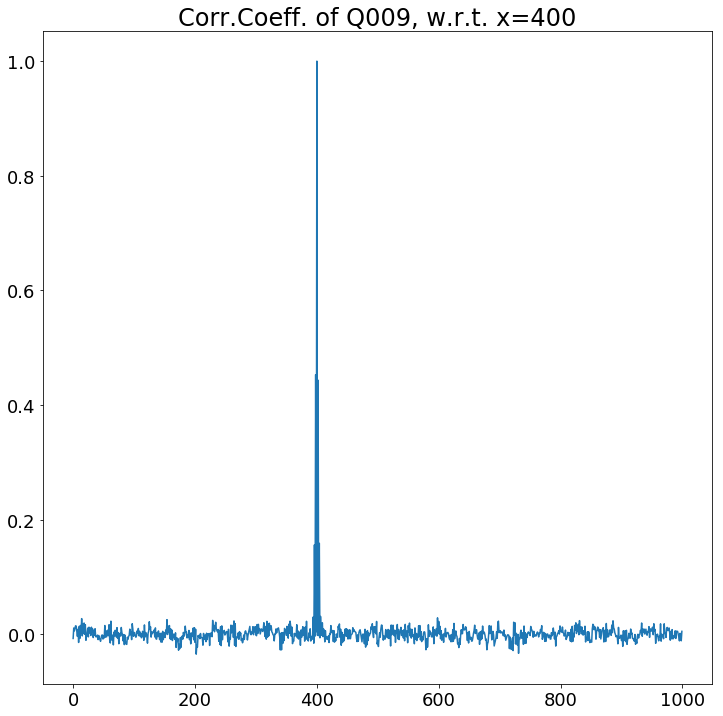

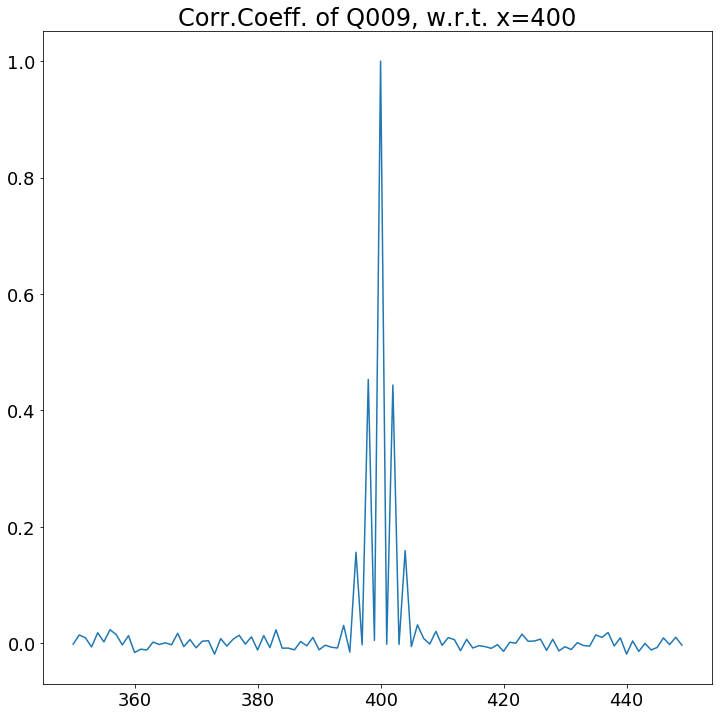

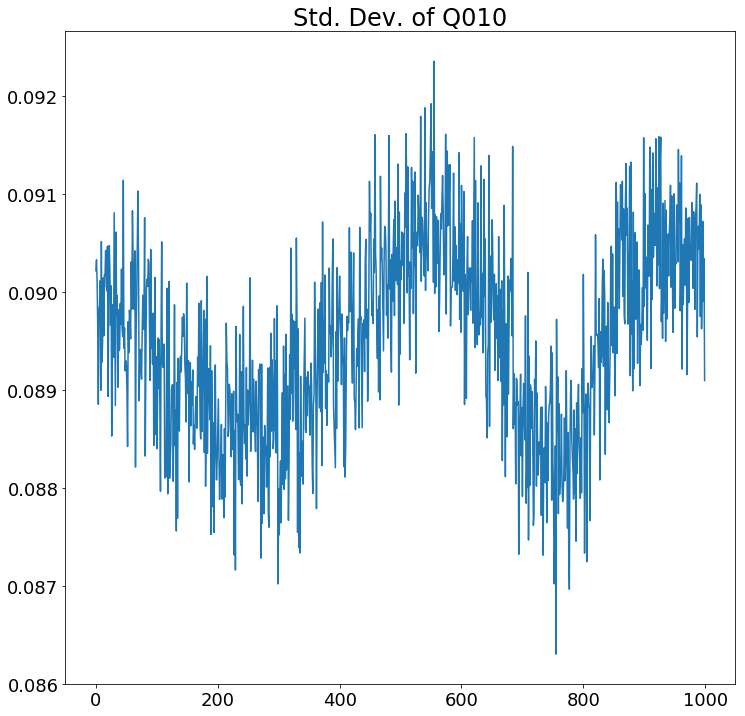

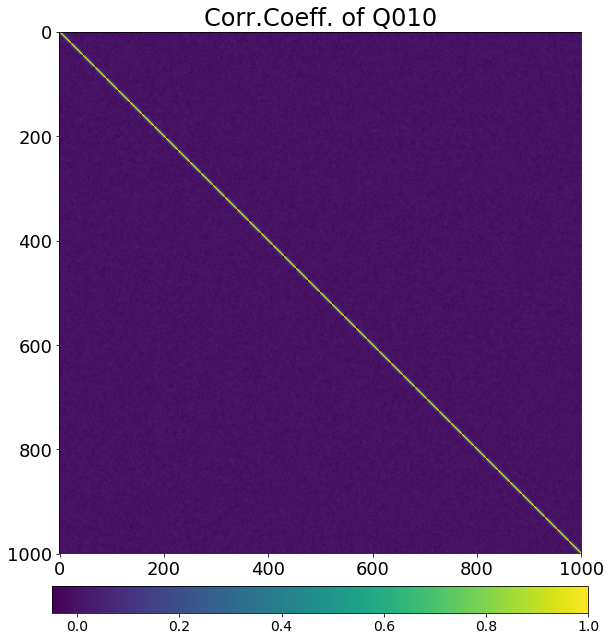

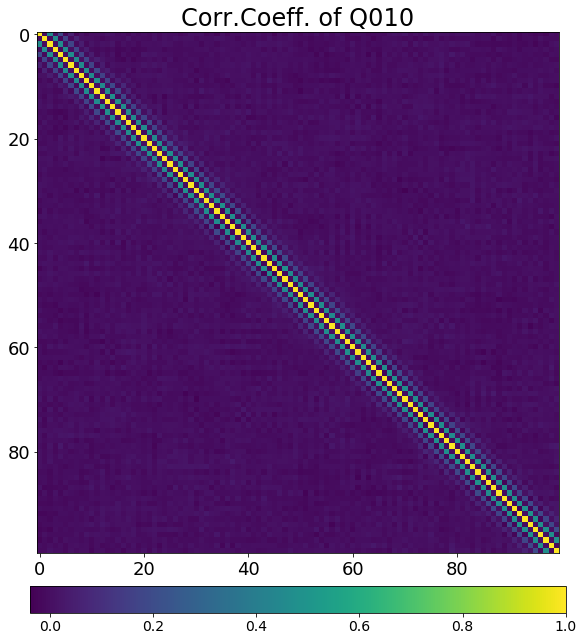

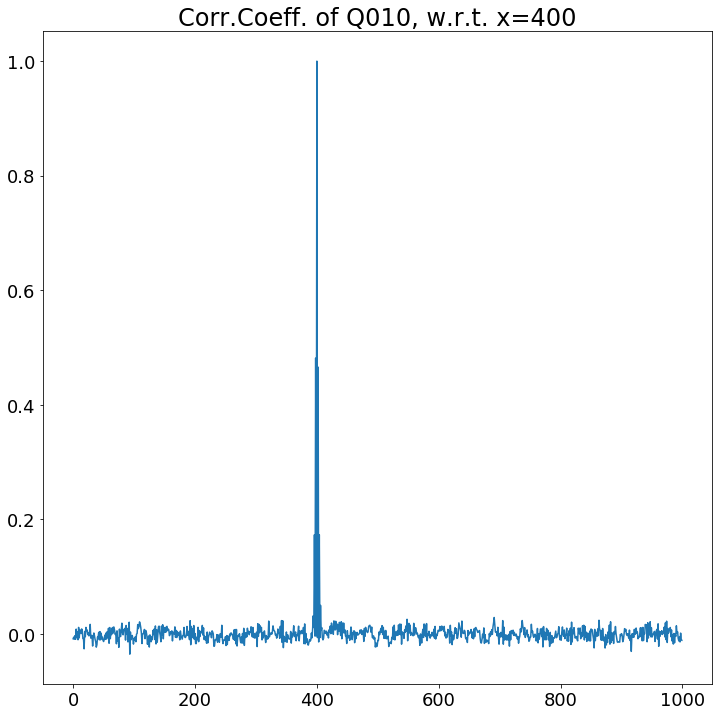

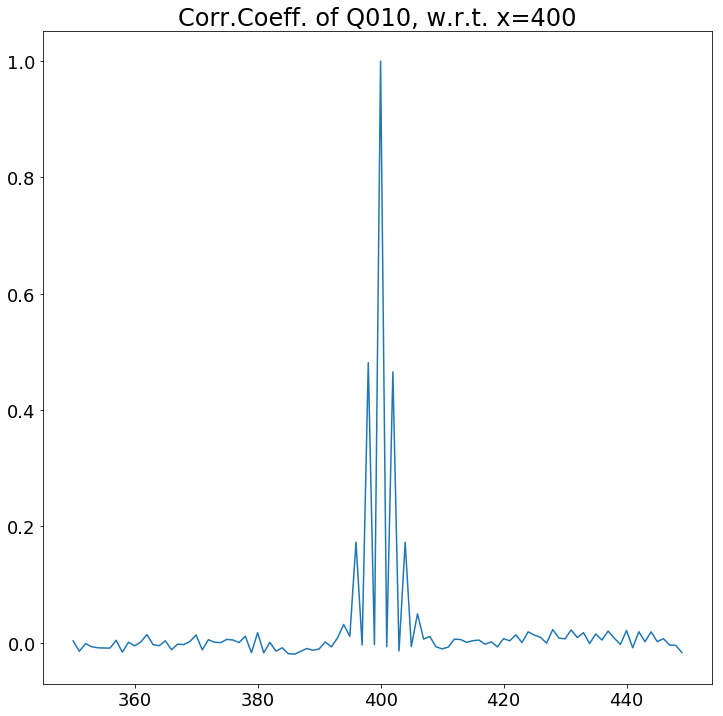

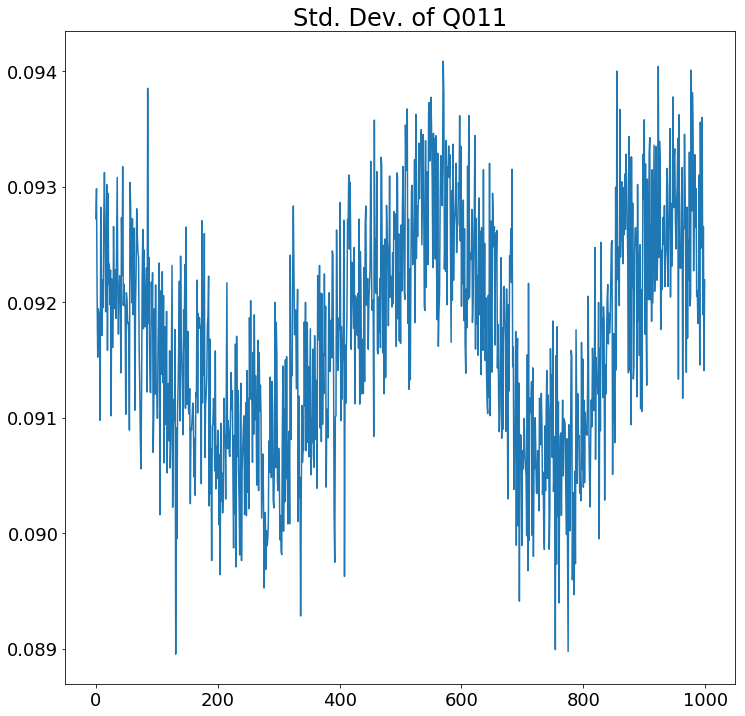

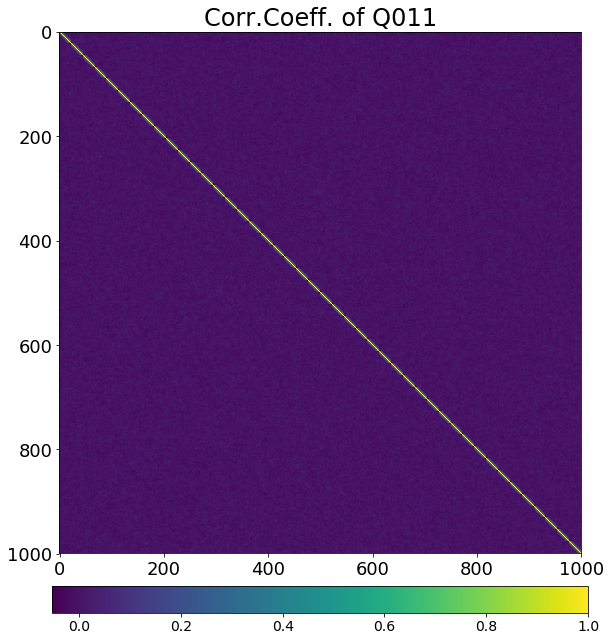

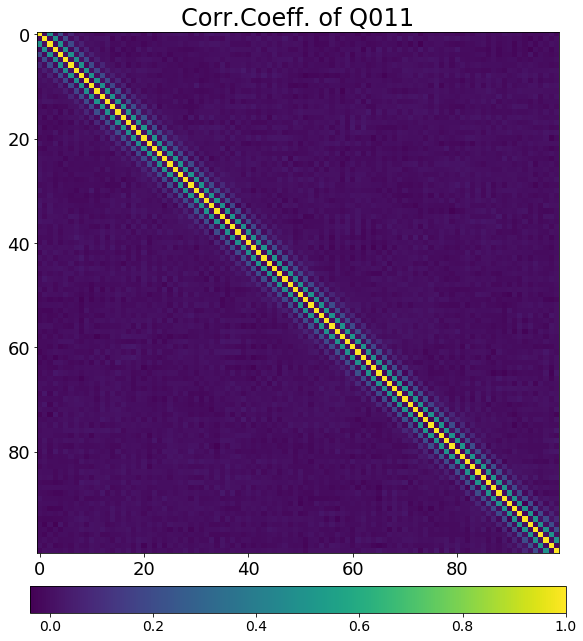

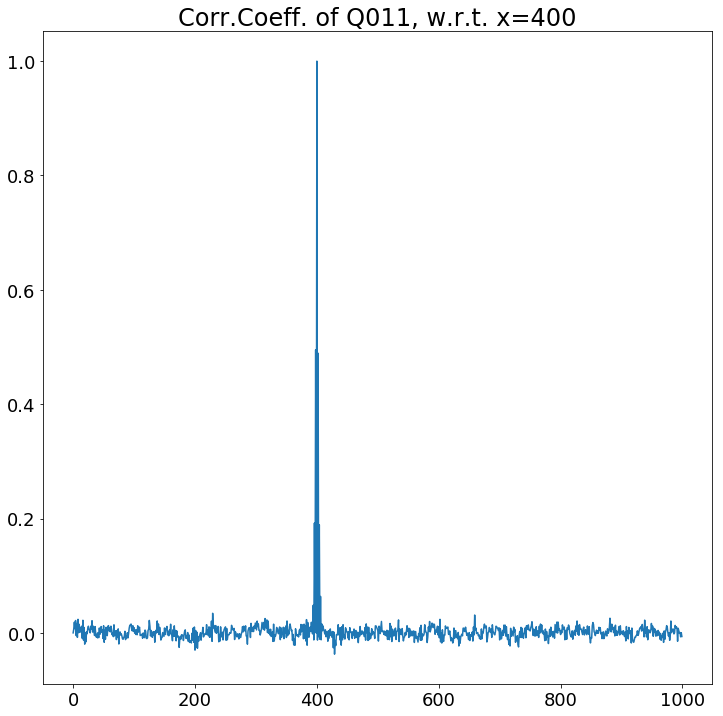

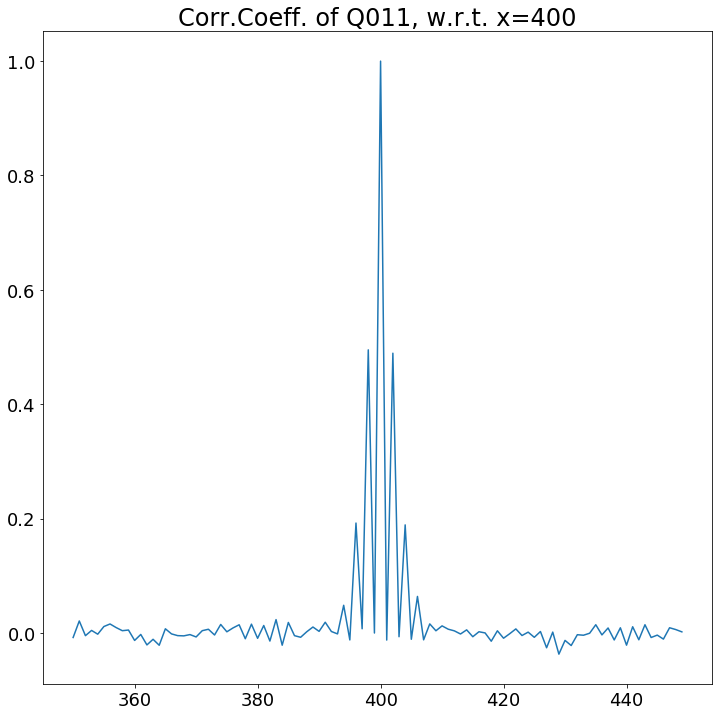

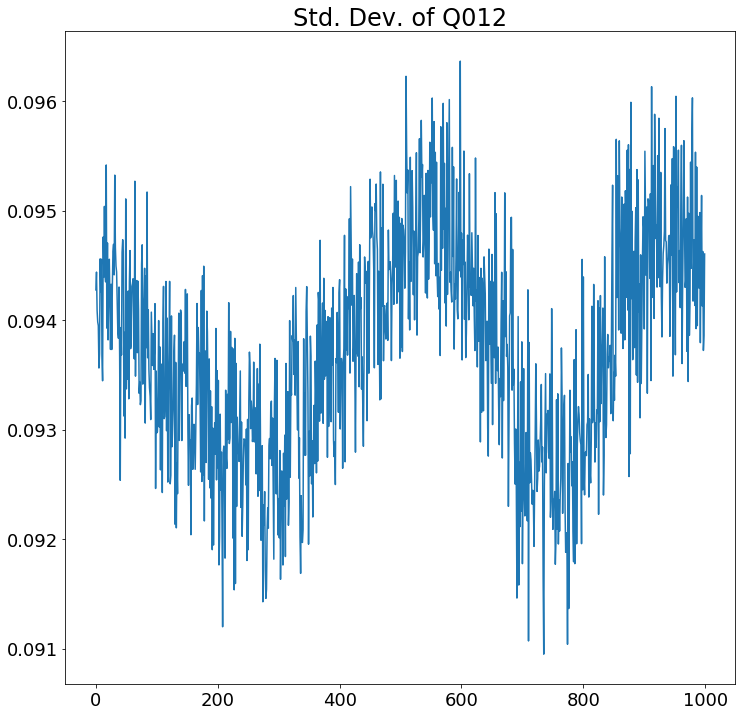

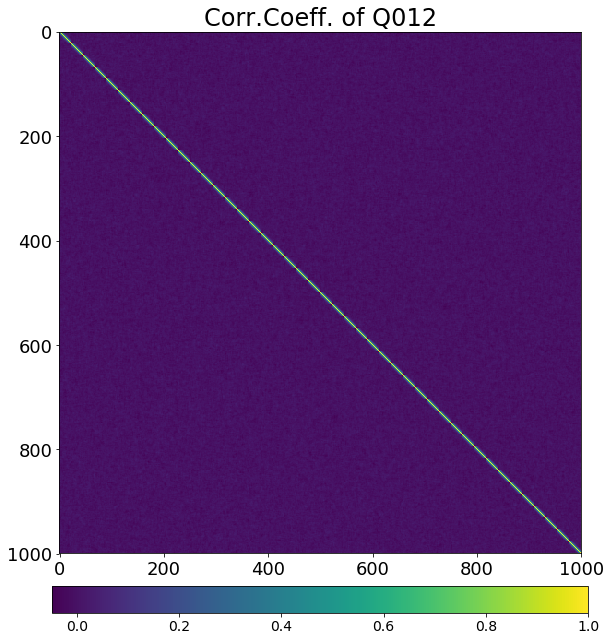

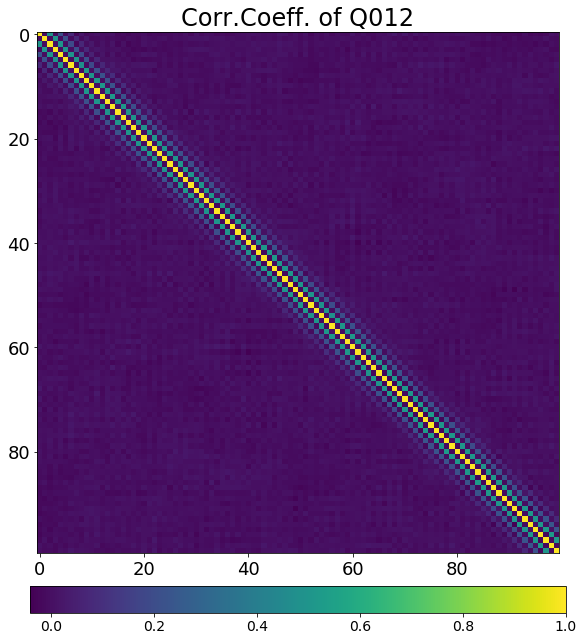

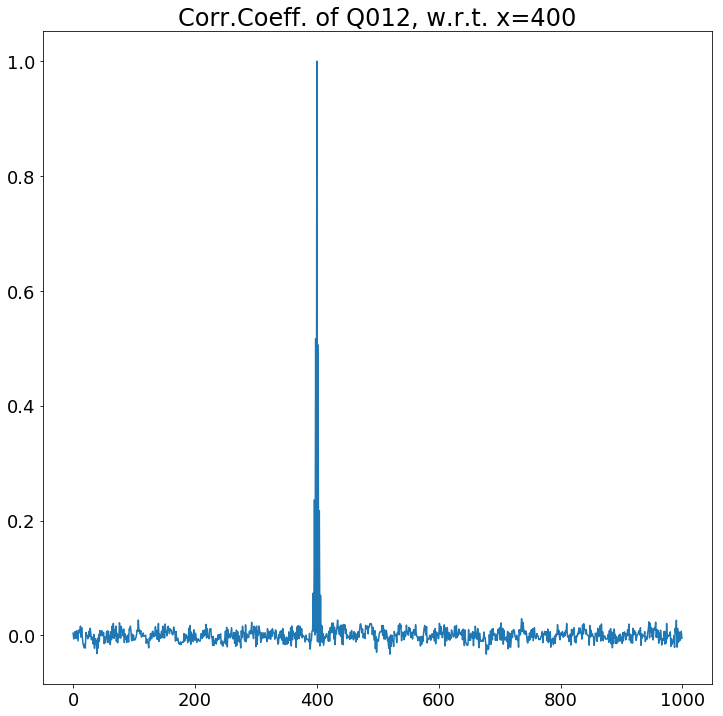

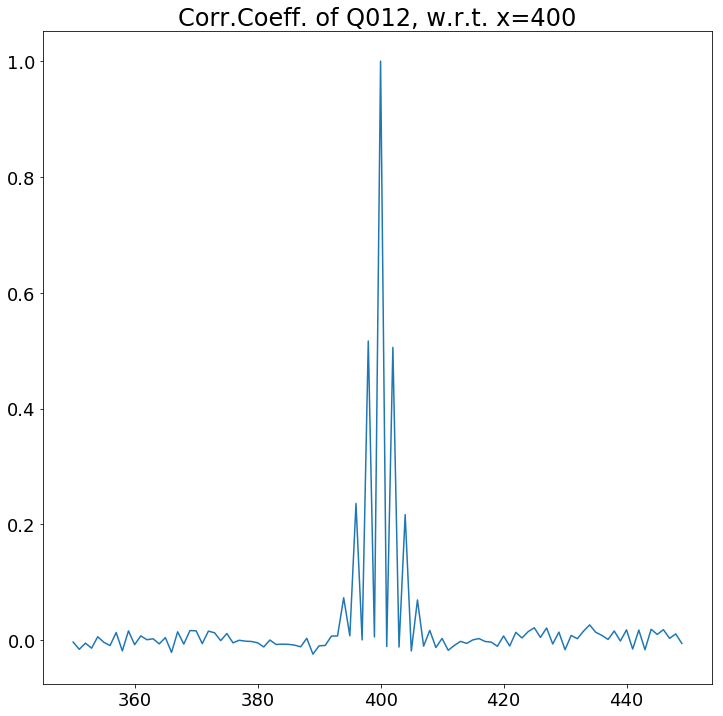

In [8]:
nx=1000
if(not os.path.isdir("images")):
    os.mkdir("images")
for t in range(7,13):
    file="concat_ens_step%0.3d.bin" %t
    data=np.fromfile(file)
    n_ens=int(data.shape[0]/nx)
    data=data.reshape((n_ens, nx))
    cov=np.cov(data.transpose())
    cor=np.corrcoef(data.transpose())
    stdv=np.sqrt(np.diag(cov))
    plot_stdv(stdv, "Std. Dev. of Q%0.3d" %t, "images/q%0.3d_stdv.png" %t)
    plot_corr_box(cor, "Corr.Coeff. of Q%0.3d" %t, "images/q%0.3d_corrcoef_matrix.png" %t)
    plot_corr_box(cor, "Corr.Coeff. of Q%0.3d" %t, "images/q%0.3d_corrcoef_matrix_zoomin.png" %t, [0,100])
    plot_corr_point(cor[400,:],"Corr.Coeff. of Q%0.3d, w.r.t. x=%d" %(t, 400), "images/q%0.3d_corrcoef_x400.png" %t)
    plot_corr_point(cor[400,:],"Corr.Coeff. of Q%0.3d, w.r.t. x=%d" %(t, 400), "images/q%0.3d_corrcoef_x400_zoomin.png" %t, [350,450])

In [ ]:
nx=1000
if(not os.path.isdir("images")):
    os.mkdir("images")
for t in [36,72,108,144,216,288]:
    file="concat_ens_step%0.3d.bin" %t
    data=np.fromfile(file)
    n_ens=int(data.shape[0]/nx)
    data=data.reshape((n_ens, nx))
    cov=np.cov(data.transpose())
    cor=np.corrcoef(data.transpose())
    stdv=np.sqrt(np.diag(cov))
    plot_stdv(stdv, "Std. Dev. of Q%0.3d" %t, "images/q%0.3d_stdv.png" %t)
    plot_corr_box(cor, "Corr.Coeff. of Q%0.3d" %t, "images/q%0.3d_corrcoef_matrix.png" %t)
    plot_corr_box(cor, "Corr.Coeff. of Q%0.3d" %t, "images/q%0.3d_corrcoef_matrix_zoomin.png" %t, [0,100])
    plot_corr_point(cor[400,:],"Corr.Coeff. of Q%0.3d, w.r.t. x=%d" %(t, 400), "images/q%0.3d_corrcoef_x400.png" %t)
    plot_corr_point(cor[400,:],"Corr.Coeff. of Q%0.3d, w.r.t. x=%d" %(t, 400), "images/q%0.3d_corrcoef_x400_zoomin.png" %t, [350,450])